# MINI PROJECT

## NUMPY,PANDAS AND VISUALIZATION

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset 

In [2]:
df_emp = pd.read_csv("C:\\Users\\DELL\\Documents\\DSE\\emp_health.csv")
df_emp

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [3]:
df_emp.head(10)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
6,i10018,46,female,33.440,1,daily,no,south,8240.58960
7,i10019,37,female,27.740,3,weekend,no,northwest,7281.50560
8,i10020,37,male,29.830,2,party,no,north,6406.41070
9,i10021,60,female,25.840,0,no,no,northwest,28923.13692


In [4]:
df_emp.shape

(1338, 9)

In [5]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [6]:
df_emp.columns

Index(['id', 'age', 'sex', 'bmi', 'dependent', 'alcohol', 'smoke', 'zone',
       'expenditure'],
      dtype='object')

### As per the DATA's provided solve the questions

#### Q1.How many employees above 50 age smoke, what is their average expenditure on health management?

In [7]:
df_emp[(df_emp["age"]>50)& (df_emp["smoke"]=="yes")]["age"]

11      62
39      60
55      58
58      53
86      57
        ..
1265    64
1284    61
1301    62
1321    62
1337    61
Name: age, Length: 64, dtype: int64

In [8]:
df_emp[(df_emp["age"]>50)& (df_emp["smoke"]=="yes")]["smoke"].count()

64

In [9]:
df_emp[(df_emp["age"]>50)& (df_emp["smoke"]=="yes")]["expenditure"].mean()

38820.22308234375

#### Q2.How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [10]:
df_emp[(df_emp["sex"]=="female")& (df_emp["alcohol"]!="daily")]["alcohol"]

5            no
7       weekend
9            no
13      weekend
16        party
         ...   
1330         no
1332      party
1335    weekend
1336      party
1337         no
Name: alcohol, Length: 453, dtype: object

In [11]:
df_emp[(df_emp["sex"]=="female")& (df_emp["alcohol"]!="daily")]["alcohol"].count()

453

In [12]:
df_emp[df_emp.sex=="female"]["sex"].count()

662

In [13]:
proportion = (453/662)*100
print(round(proportion,2),"%")

68.43 %


#### Q3.Display zone wise average expenditure of employees on health

In [14]:
pivot1 = pd.pivot_table(data = df_emp, values = "expenditure", columns = "zone")
pivot1

zone,east,north,northeast,northwest,south,southeast,southwest,west
expenditure,13774.679941,14102.583403,13694.721724,12151.702619,14715.689519,14452.94968,12717.083869,12182.998872


#### Q4.Employees of which zone did maximum expenditure on health

In [15]:
df_emp.groupby(by="zone").sum().sort_values(by="expenditure",ascending=False).head(1)

,age,bmi,dependent,expenditure
zone,,,,
east,10161,7987.26,254,3.608966e+06


#### Q5.What is the minimum expenditure done by any employee in organization

In [16]:
df_emp.groupby(by="id").sum().sort_values(by="expenditure").head(1)

,age,bmi,dependent,expenditure
id,,,,
i10952,18,23.21,0,1121.8739


#### Q6.What is average expenditure of employees who have 2 or lesser dependents

In [17]:
df_emp[df_emp.dependent<=2]["expenditure"]

0       16884.92400
1        1725.55230
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1331    10795.93733
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: expenditure, Length: 1138, dtype: float64

In [18]:
df_emp[df_emp.dependent<=2]["expenditure"].mean()

13040.970970948145

#### Q7.How many employees are below age of 20 years. What is their average BMI

In [19]:
df_emp[df_emp.age<20]["age"]

0       19
1       18
15      19
22      18
31      18
        ..
1315    18
1316    19
1317    18
1334    18
1335    18
Name: age, Length: 137, dtype: int64

In [20]:
df_emp[df_emp.age<20]["age"].count()

137

In [21]:
df_emp[df_emp.age<20]["bmi"].mean()

29.971496350364966

#### Q8.Create a dataframe "non_smoker" for all non-smoker male employees

In [22]:
non_smoker = pd.DataFrame(df_emp)
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [23]:
non_smoker[(non_smoker.sex=="male")&(non_smoker.smoke=="no")]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


#### Q9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [24]:
non_alcoholic = pd.DataFrame(df_emp)
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [25]:
non_alcoholic[(non_alcoholic.sex=="male")&(non_alcoholic.alcohol=="no")]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


#### Q10.Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol (Hint:Use join and dataframes created in Q8 and Q9)


In [26]:
non_smoker_alcoholic = non_smoker.join(non_alcoholic.set_index(['id','smoke','alcohol']),on=['id','smoke','alcohol'], how="inner", lsuffix="_x", rsuffix="_y").loc[:,['id','smoke','alcohol']]
non_smoker_alcoholic

,id,smoke,alcohol
0,i10012,yes,daily
1,i10013,no,weekend
2,i10014,no,rarely
3,i10015,no,daily
4,i10016,no,party
...,...,...,...
1333,i11345,no,no
1334,i11346,no,daily
1335,i11347,no,weekend
1336,i11348,no,party


#### Q11.What is the count for each zone with respect to number of dependent

In [27]:
pivot2 = pd.pivot_table(data = df_emp, index =['zone','dependent'] ,
                        values = 'id', aggfunc='count' , columns=None  )
df1 = pivot2.reset_index()
df1

,zone,dependent,id
0,east,0,124
1,east,1,65
2,east,2,42
3,east,3,22
4,east,4,6
5,east,5,3
6,north,0,26
7,north,1,20
8,north,2,10
9,north,3,12


In [28]:
df_count = df1.rename(columns={'id': 'count'})
df_count

,zone,dependent,count
0,east,0,124
1,east,1,65
2,east,2,42
3,east,3,22
4,east,4,6
5,east,5,3
6,north,0,26
7,north,1,20
8,north,2,10
9,north,3,12


#### Q12.Classify the employees into 3 categories.

#### a)What is the average expenditure of employees in each category.   b)Display the bar chart for the same


In [29]:
df_underweightCategory = df_emp[df_emp['bmi'] < 18.5]
df_underweightCategory_expenditure = df_underweightCategory['expenditure'].mean()
df_fitCategory  = df_emp[  ( df_emp['bmi'] > 18.5) & (df_emp['bmi'] < 24.9)      ] 
df_fitCategory_expenditure = df_fitCategory['expenditure'].mean()
df_overweight = df_emp[df_emp ['bmi'] > 24.9]
df_overweight_expenditure = df_overweight['expenditure'].mean()

data = [['data_underweight',df_underweightCategory_expenditure],
       ['fit',df_fitCategory_expenditure],
        ['overweight',df_overweight_expenditure]]
data

[['data_underweight', 8852.200585000002],
 ['fit', 10404.900083891405],
 ['overweight', 13936.616823466235]]

In [30]:
CN = pd.DataFrame(data,columns = ["bmi_category","avg_expenditure"])
CN

,bmi_category,avg_expenditure
0,data_underweight,8852.200585
1,fit,10404.900084
2,overweight,13936.616823


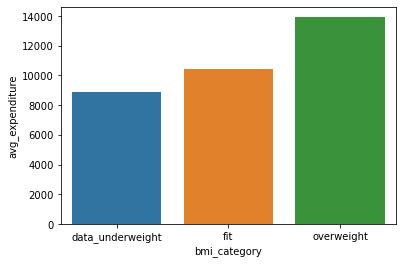

In [31]:
sns.barplot(x='bmi_category',y='avg_expenditure',data= CN)
plt.show()

#### Q13.Draw line plot of expenditure against age and BMI

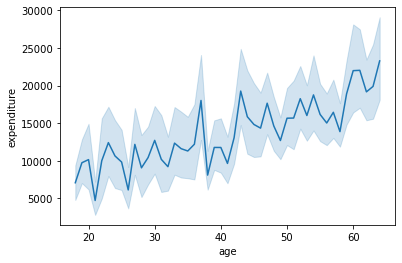

In [32]:
sns.lineplot(data = df_emp, x = "age", y = "expenditure")
plt.show()

#### Q14.Draw a bar chart to show zone wise average expenditure

In [33]:
df2 = df_emp.groupby(by="zone")["expenditure"].sum()
df3 = df2.reset_index()
df3

,zone,expenditure
0,east,3.608966e+06
1,north,9.871808e+05
2,northeast,1.013409e+06
3,northwest,1.761997e+06
4,south,1.236118e+06
5,southeast,2.861684e+06
6,southwest,3.191988e+06
7,west,3.094482e+06


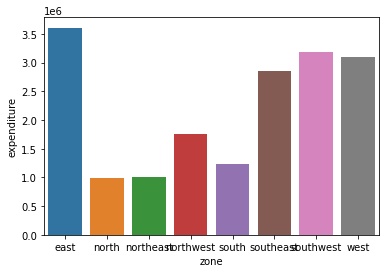

In [34]:
sns.barplot(data = df3, x = "zone", y = "expenditure")
plt.show()

#### Q15.Draw a bar chart to show smoking and alcoholic habits against average expenditure

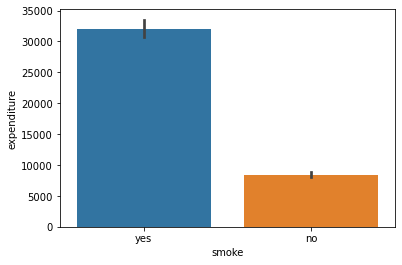

In [35]:
sns.barplot(data = df_emp, x = "smoke", y = "expenditure")
plt.show()

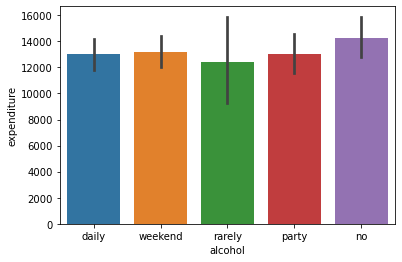

In [36]:
sns.barplot(data = df_emp, x = "alcohol", y = "expenditure")
plt.show()

#### Q16.Draw pie chart for alcohol consumption habits

In [37]:
pivot3 = pd.pivot_table(data = df_emp ,index = 'alcohol', values= 'expenditure',
                      aggfunc=np.sum )
df3 = pivot3.reset_index()
df3

,alcohol,expenditure
0,daily,5.135700e+06
1,no,3.697767e+06
2,party,3.628062e+06
3,rarely,7.327615e+05
4,weekend,4.561534e+06


In [38]:
alcohol = []
for i in df3['alcohol']:
    alcohol.append(i)
alcohol

['daily', 'no', 'party', 'rarely', 'weekend']

In [39]:
expenditure = []
for i in df3['expenditure']:
    expenditure.append(i)
expenditure

[5135700.32244, 3697766.539339, 3628062.11761, 732761.52023, 4561534.49114]

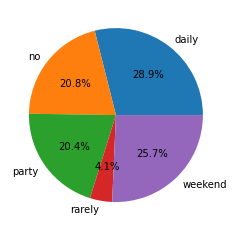

In [40]:
plt.pie(x=expenditure ,labels=alcohol ,autopct='%1.1f%%')
plt.show()

#### Q17.Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

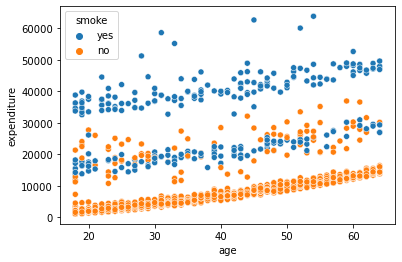

In [41]:
sns.scatterplot(x="age", y="expenditure",hue="smoke",data=df_emp)
plt.show()

#### Q18.Draw distribution plot of expenditure

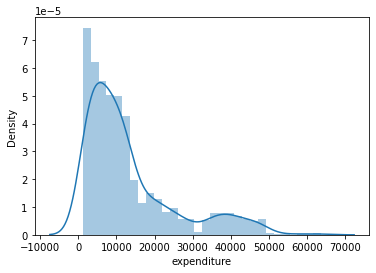

In [42]:
sns.distplot(df_emp['expenditure'])
plt.show()

#### Q19.Display the pairplot

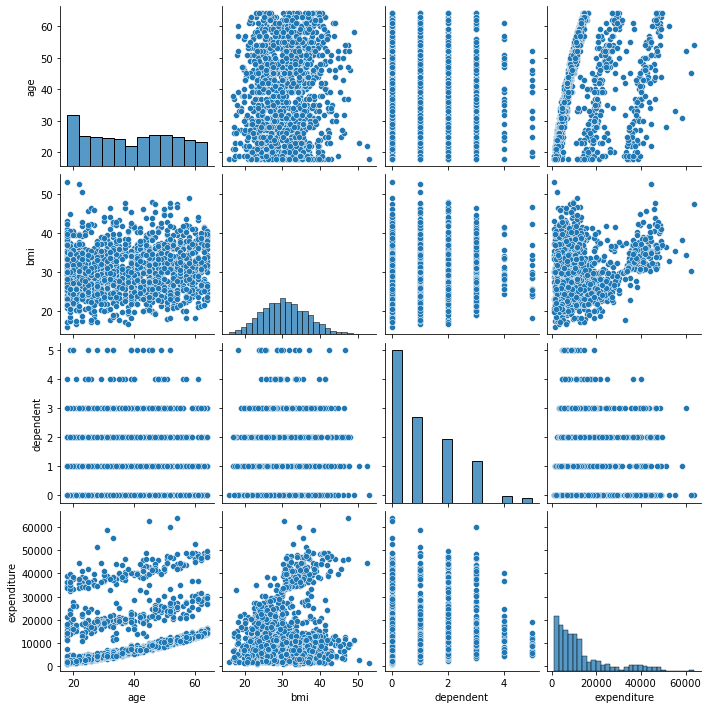

In [43]:
sns.pairplot(df_emp)
plt.show()

#### Q20.Display heatmap for the data

In [44]:
df_emp.corr()

,age,bmi,dependent,expenditure
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
dependent,0.042469,0.012759,1.000000,0.067998
expenditure,0.299008,0.198341,0.067998,1.000000


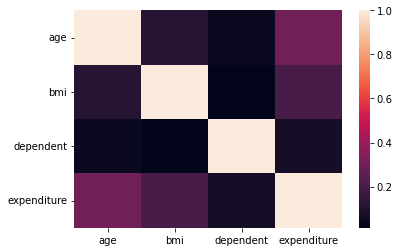

In [45]:
HM = sns.heatmap(df_emp.corr())
plt.show()